In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("car data.csv") # read the data as a csv file 

In [3]:
data.head(5) # first 5 rows 


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.isnull().any() # we have no missing values 
data.isnull().sum() # in the event in which we did have missing values, this would tell us how many 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [133]:
data.describe() # get summary statistics of each column in the dataset 

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,log_value
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,0.911358
std,2.891554,5.082812,8.644115,38886.883882,0.247915,1.271646
min,2003.000000,0.100000,0.320000,500.000000,0.000000,-2.302585
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,-0.105361
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,1.280934
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.791759
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,3.555348


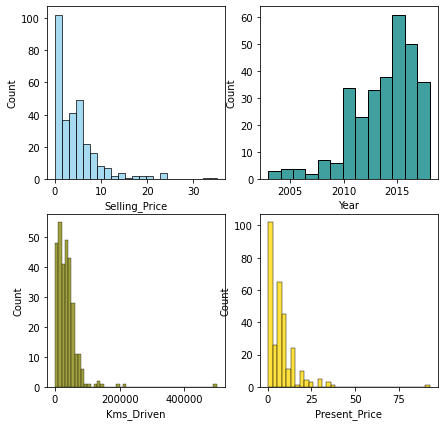

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data["Selling_Price"], color = "skyblue", ax=axs[0, 0])
sns.histplot(data["Year"], color = "teal", ax=axs[0, 1])
sns.histplot(data["Kms_Driven"], color = "olive", ax=axs[1, 0])
sns.histplot(data["Present_Price"], color = "gold", ax=axs[1, 1])

# we see here that the selling price is not normally distributed. If we were to do linear regression, one of the most important assumption is that the independant variable be normally distributed. 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


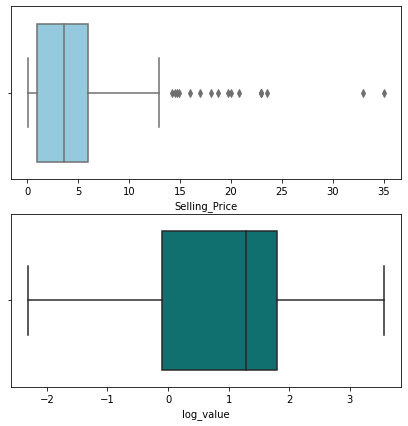

In [132]:
data['log_value'] = np.log(data['Selling_Price'])

selling_price = data["Selling_Price"]
log_value = data['log_value']


fig, axs = plt.subplots(2, 1, figsize=(7, 7))

sns.boxplot(data["Selling_Price"], color = "skyblue", ax=axs[0])
sns.boxplot(data["log_value"], color = "teal", ax=axs[1])


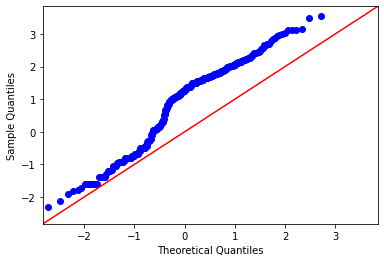

In [115]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

sm.qqplot(log_value, line='45')
pylab.show()

data_observations = data.drop(['Selling_Price', 'log_value'], axis = 1)
data_target = data["log_value"]




In [ ]:
sns.pairplot(data) # it seems that the owner covariate may not be very useful. Therefore let's perform model variable selection next. 

In [ ]:
select = SelectPercentile(percentile=50) 
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_selected.shape: {}".format(X_train_selected.shape))


In [21]:
X = ['Car_Name',	'Fuel_Type',	'Seller_Type',	'Transmission',	'Owner']

In [36]:
data_new = pd.get_dummies(data_observations, columns= X) #convert categorical variables to dummy variables. 


In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile

X_train, X_test, y_train, y_test = train_test_split(data_new, data_target, random_state=0)
lr = LinearRegression().fit(X_train, y_train)


select = SelectPercentile(percentile=50) 
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train.shape: (225, 111)
X_train_selected.shape: (225, 55)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 5  6 12 14 15 18 25 36 38 41 42 43 48 59 73 77 82 88 91 94 98] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [163]:
# Before Variable Selection 

print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

#After Variable Selection 
lr.fit(X_train_selected, y_train)

X_test_selected = select.transform(X_test)


print("Training set score: {:.2f}".format(lr.score(X_train_selected, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test_selected, y_test)))






Training set score: 0.96
Test set score: 0.92


In [164]:
# Check diagnostic plots to see if regression assumptions are satisfied
